In [1]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense,LSTM
np.random.seed(7)
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [2]:
#inserting API Keys
consumer_key= 'consumer_secret= 'access_token='access_token_secret='auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
#searcing company on twitter
public_tweets = api.search('Facebook')
print public_tweets[2].text

https://t.co/fUalYwGR1Y


In [4]:
#Defining a threshold for each sentiment
threshold=0
pos_sent_tweet=0
neg_sent_tweet=0
for tweet in public_tweets:
    analysis=TextBlob(tweet.text)
    if analysis.sentiment.polarity>=threshold:
        pos_sent_tweet=pos_sent_tweet+1
    else:
        neg_sent_tweet=neg_sent_tweet+1
if pos_sent_tweet>neg_sent_tweet:
    print "Overall Positive"
else:
    print "Overall Negative"

Overall Positive


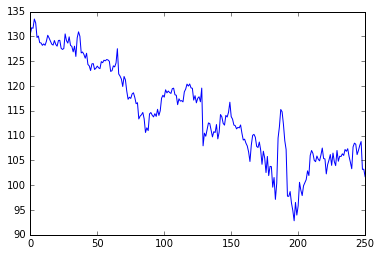

In [5]:
#data collection
dates = []
prices = []
def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return
get_data('fb.csv')
plt.plot(prices)

plt.show()

In [37]:
def create_datasets(dates,prices):
    train_size=int(0.80*len(dates))
    TrainX,TrainY=[],[]
    TestX,TestY=[],[]
    cntr=0
    for date in dates:
        if cntr<train_size:
            TrainX.append(date)
        else:
            TestX.append(date)    
    for price in prices:
        if cntr<train_size:
            TrainY.append(price)
        else:
            TestY.append(price)
            
    return TrainX,TrainY,TestX,TestY

def predict_prices(dates,prices,x):
    TrainX,TrainY,TestX,TestY=create_datasets(dates,prices)

    TrainX=np.reshape(TrainX,(len(TrainX),1))
    TrainY=np.reshape(TrainY,(len(TrainY),1))
    TestX=np.reshape(TestX,(len(TestX),1))
    TestY=np.reshape(TestY,(len(TestY),1))
    
    #for i in range(251):
     #   print TrainX[i],TrainY[i],'\n'
    
    
    model=Sequential()
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(32,input_dim=1,init='uniform',activation='relu'))
    model.add(Dense(16,init='uniform',activation='relu'))
    
    model.add(Dense(1,init='uniform',activation='relu'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    model.fit(TrainX,TrainY,nb_epoch=100,batch_size=3,verbose=1)
    

In [ ]:
predict_prices(dates,prices,2)

Epoch 1/100
251/251 [==============================] - 0s - loss: 13107.5603 - acc: 0.0000e+00     
Epoch 2/100
251/251 [==============================] - 0s - loss: 8394.3455 - acc: 0.0000e+00     
Epoch 3/100
251/251 [==============================] - 0s - loss: 2819.3622 - acc: 0.0000e+00     
Epoch 4/100
251/251 [==============================] - 0s - loss: 2745.3931 - acc: 0.0000e+00     
Epoch 5/100
251/251 [==============================] - 0s - loss: 2634.5945 - acc: 0.0000e+00     
Epoch 6/100
251/251 [==============================] - 0s - loss: 2576.6255 - acc: 0.0000e+00     
Epoch 7/100
251/251 [==============================] - 0s - loss: 2494.7861 - acc: 0.0000e+00     
Epoch 8/100
251/251 [==============================] - 0s - loss: 2407.4080 - acc: 0.0000e+00     
Epoch 9/100
251/251 [==============================] - 0s - loss: 2332.5871 - acc: 0.0000e+00     
Epoch 10/100
251/251 [==============================] - 0s - loss: 2234.5649 - acc: 0.0000e+00     
Epoch 11